# Monthly milk production: pounds per cow. Jan 62 – Dec 75

Data: https://datamarket.com/data/set/22ox/monthly-milk-production-pounds-per-cow-jan-62-dec-75#!ds=22ox&display=line

## Load Data

In [1]:
%matplotlib inline
import numpy as np

In [2]:
data = []
with open('./data/monthly-milk-production-pounds-p.csv') as fh:
    fh.next()
    for line in fh:
        production = line.strip().split(',')[-1]
        data.append(production) 
data = np.array(data[: -3], dtype=np.float)

Number of Data points

In [3]:
len(data)

168

### Normalize Data

In [4]:
# data = (data - np.mean(data))/np.std(data)
data = (data - np.min(data))/(np.max(data) - np.min(data))

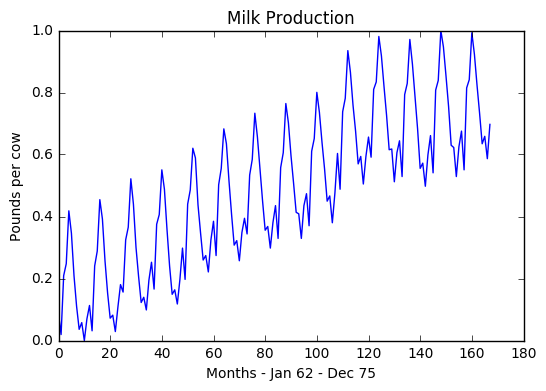

In [5]:
import matplotlib.pyplot as plt
plt.plot(range(len(data)), data)
plt.xlabel('Months - Jan 62 - Dec 75')
plt.ylabel('Pounds per cow')
plt.title('Milk Production')
plt.show()

## Train, Test sets

In [6]:
def create_sequences(series, window_size):
    X = [series[i: i+window_size] for i in range(len(series)-window_size)]
    y = [series[i+window_size] for i in range(len(series)-window_size)]
    X = np.array(X, dtype=np.float)
    y = np.array(y, dtype=np.float)
    return X, y

In [7]:
window_size = 6
sequences, prediction = create_sequences(data, window_size)
m, n = sequences.shape
sequences = np.reshape(sequences, (m, n, 1))

In [8]:
train_test_split = np.int(np.ceil(0.7*len(sequences)))
X_train, y_train = sequences[:train_test_split, :], prediction[:train_test_split]
X_test, y_test = sequences[train_test_split:, :], prediction[train_test_split:]

## Simple RNN Model

In [9]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense, Reshape

Using TensorFlow backend.


In [49]:
_input = Input(shape=(window_size, 1))
lstm = LSTM(200, activation='relu')(_input)
y_hat = Dense(1)(lstm)

In [50]:
from keras.optimizers import Adam
model = Model(inputs=[_input], outputs=[y_hat])

learning_rate = 0.0005
optimizer = Adam(lr=learning_rate)

model.compile(optimizer=optimizer, loss='mean_squared_error')

In [51]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('weights.hdf5', monitor='val_loss',
                            save_best_only=True, verbose=1)
history = model.fit(X_train, y_train, epochs=300,
                   validation_split=0.2, batch_size=50, verbose=2,
                   callbacks=[checkpoint])

Train on 91 samples, validate on 23 samples
Epoch 1/300
Epoch 00000: val_loss improved from inf to 0.39974, saving model to weights.hdf5
1s - loss: 0.1527 - val_loss: 0.3997
Epoch 2/300
Epoch 00001: val_loss improved from 0.39974 to 0.38245, saving model to weights.hdf5
0s - loss: 0.1455 - val_loss: 0.3825
Epoch 3/300
Epoch 00002: val_loss improved from 0.38245 to 0.36539, saving model to weights.hdf5
0s - loss: 0.1381 - val_loss: 0.3654
Epoch 4/300
Epoch 00003: val_loss improved from 0.36539 to 0.34845, saving model to weights.hdf5
0s - loss: 0.1307 - val_loss: 0.3484
Epoch 5/300
Epoch 00004: val_loss improved from 0.34845 to 0.33104, saving model to weights.hdf5
0s - loss: 0.1241 - val_loss: 0.3310
Epoch 6/300
Epoch 00005: val_loss improved from 0.33104 to 0.31306, saving model to weights.hdf5
0s - loss: 0.1168 - val_loss: 0.3131
Epoch 7/300
Epoch 00006: val_loss improved from 0.31306 to 0.29441, saving model to weights.hdf5
0s - loss: 0.1092 - val_loss: 0.2944
Epoch 8/300
Epoch 0000

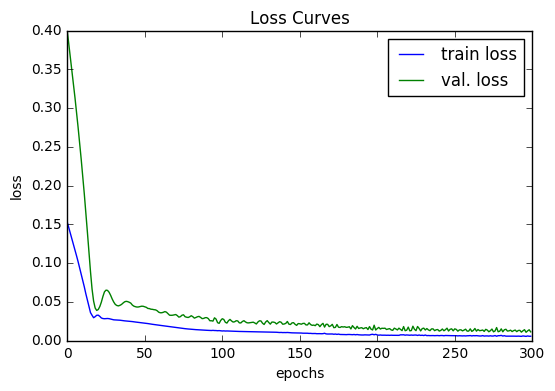

In [52]:
plt.plot(history.epoch, history.history['loss'], label='train loss')
plt.plot(history.epoch, history.history['val_loss'], label='val. loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss Curves')
plt.legend()
plt.show()

In [53]:
model.load_weights('weights.hdf5')

# print out training and testing errors
training_error = model.evaluate(X_train, y_train, verbose=0)
print('training error = ' + str(training_error))

testing_error = model.evaluate(X_test, y_test, verbose=0)
print('testing error = ' + str(testing_error))

training error = 0.00690310629771
testing error = 0.0120026214669


In [54]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

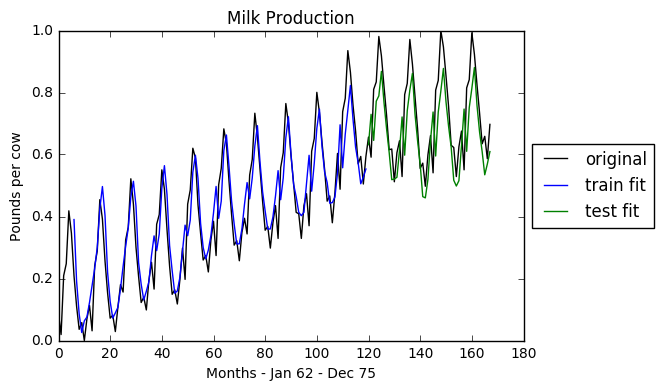

In [55]:
plt.plot(range(len(data)), data, 'k', label='original')
plt.plot(range(window_size, window_size+len(X_train)), 
         train_predict, label='train fit')
plt.plot(range(train_test_split+window_size, train_test_split+window_size+len(X_test)),
         test_predict, label='test fit')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Months - Jan 62 - Dec 75')
plt.ylabel('Pounds per cow')
plt.title('Milk Production')
plt.show()